# Exploratory Data Analysis

The first step is to conduct an exploratory data analysis (EDA), to identify trends, patterns, and outliers in the dataset. Note: Only Uber data will be used in this analysis and the upcoming modelling.


First, we import the necessary Python libraries.

In [53]:
#@title Imports for Project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

Loading the CSV using Pandas and taking a quick look inside the dataset below.

In [24]:

df = pd.read_csv('../data/rideshare_kaggle.csv')
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [25]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [26]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
cab_types = df['cab_type'].unique()
print(cab_types)

['Lyft' 'Uber']


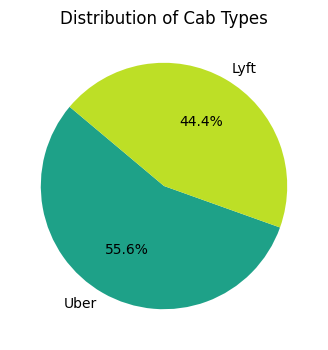

In [27]:
cab_type_counts = df['cab_type'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(cab_type_counts, labels=cab_type_counts.index, autopct='%1.1f%%', startangle=140, colors = ['#1ea188', '#bddf26'])
plt.title('Distribution of Cab Types')
plt.show()

Creating a Pandas DataFrame with only Uber records, as we will be only using Uber data in our model development.

In [28]:
df2 = df[df['cab_type'] != 'Lyft'].copy()
new_cab_types = df2['cab_type'].unique()
print(new_cab_types)

['Uber']


Next, we will check for null values, and then replace them with the mean of the other not null values in that column.

In [29]:
print(df2.isnull().sum())
print(df2.isnull().sum().sum())

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [30]:
percentage_missing = df['price'].isnull().sum() / len(df) * 100
print(f"Percentage of missing values in the Uber price column: {percentage_missing}%")

Percentage of missing values in the Uber price column: 7.949402009317949%


Although only a small percentage of values in the price column are missing, the corresponding records will be dropped instead of imputed - imputing a large number of missing values with a single value can lead to reduced accuracy and overfitting (since it may not reflect the real-world distribution of prices).

In [31]:
df2 = df[df['price'].notna()]
print(df2.isnull().sum())
print(df2.isnull().sum().sum())

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

Now, we will visualize our data. First, is the number of rides per month. The data only contains data from November to December 2018, as apparent.

Text(0.5, 1.0, 'Ride Count per Month')

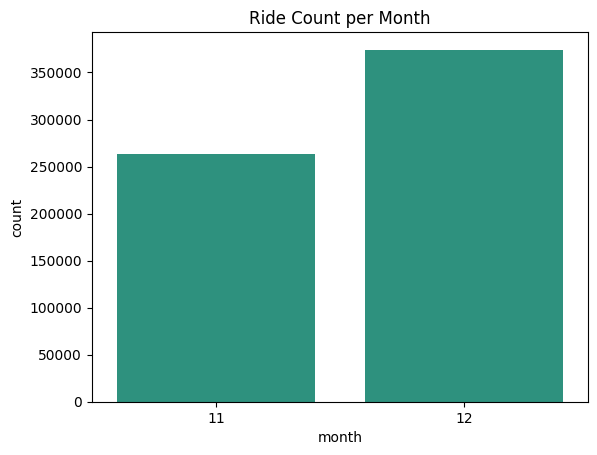

In [32]:
sns.countplot(x='month', data=df2, color='#1ea188')
df2['month'].value_counts()
plt.title('Ride Count per Month')

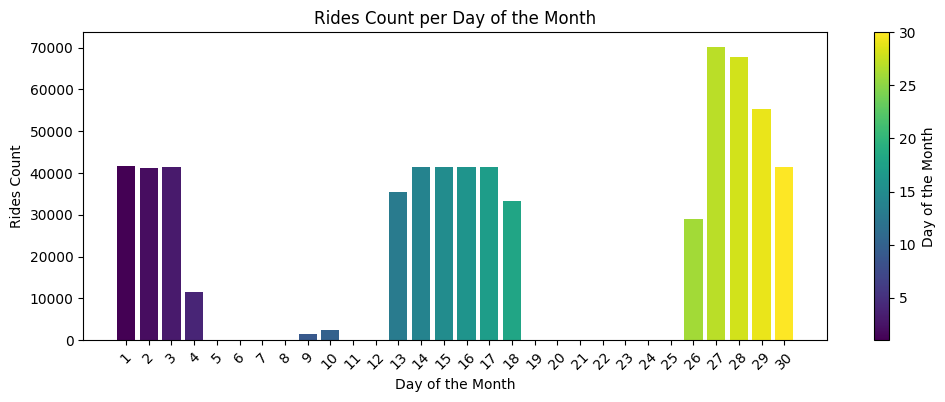

In [33]:
rides_per_day = df2['day'].value_counts().sort_index()
rides_per_day = rides_per_day.reindex(range(1, 31), fill_value=0)  
norm = plt.Normalize(1, 30)  
colors = plt.cm.viridis(norm(rides_per_day.index))
fig, ax = plt.subplots(figsize=(12, 4))

ax.bar(rides_per_day.index, rides_per_day.values, color=colors)

sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Day of the Month')

ax.set_xlabel('Day of the Month')
ax.set_ylabel('Rides Count')
ax.set_title('Rides Count per Day of the Month')  # Corrected title
ax.set_xticks(range(1, 31))
ax.set_xticklabels(range(1, 31), rotation=45)

plt.show()

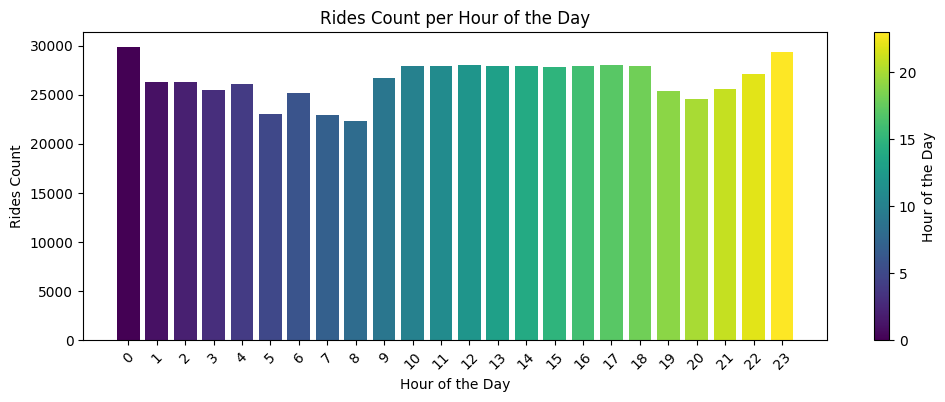

In [34]:
rides_per_hour = df2['hour'].value_counts().sort_index()
rides_per_hour = rides_per_hour.reindex(range(0, 24), fill_value=0)  
norm = plt.Normalize(0, 23)  
colors = plt.cm.viridis(norm(rides_per_hour.index))
fig, ax = plt.subplots(figsize=(12, 4))

ax.bar(rides_per_hour.index, rides_per_hour.values, color=colors)

sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Hour of the Day')

ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Rides Count')
ax.set_title('Rides Count per Hour of the Day')  # Corrected title
ax.set_xticks(range(0, 24))
ax.set_xticklabels(range(0, 24), rotation=45)

plt.show()


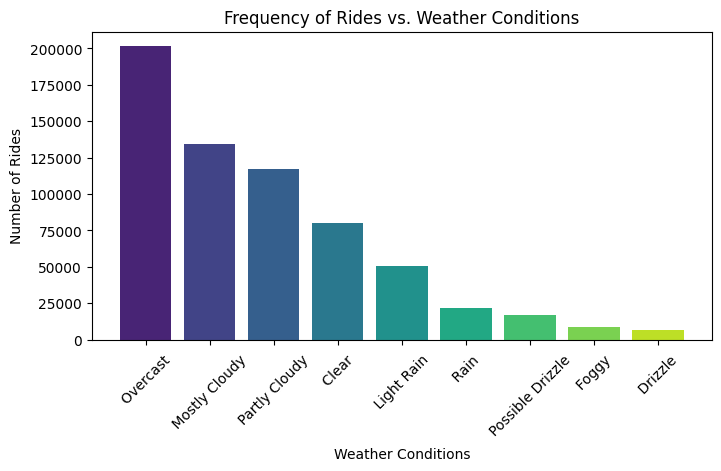

In [35]:
ride_counts_by_weather = df2['short_summary'].value_counts()
ride_counts_by_weather = ride_counts_by_weather.sort_values(ascending=False)
n_colors = ride_counts_by_weather.size  # Number of unique weather conditions
palette = sns.color_palette("viridis", n_colors)

plt.figure(figsize=(8, 4))
bars = plt.bar(ride_counts_by_weather.index, ride_counts_by_weather.values, color=palette)

plt.title('Frequency of Rides vs. Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)  # Rotate labels to prevent overlap
plt.show()

Now, we'll take a look at the distribution of price, and also how the distance of the trip affects it.

In [36]:
df2_describe = pd.DataFrame(df2['price'])
df2_describe.describe()

,price
count,637976.000000
mean,16.545125
std,9.324359
min,2.500000
25%,9.000000
50%,13.500000
75%,22.500000
max,97.500000


In [37]:
df2_describe = pd.DataFrame(df2['distance'])
df2_describe.describe()

,distance
count,637976.000000
mean,2.189261
std,1.135413
min,0.020000
25%,1.270000
50%,2.160000
75%,2.930000
max,7.860000


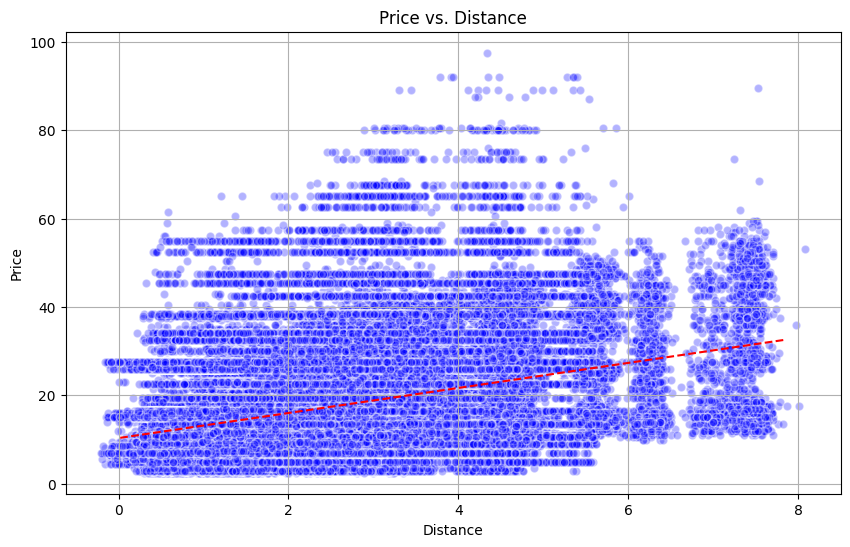

In [38]:
z = np.polyfit(df2['distance'], df2['price'], 1)
p = np.poly1d(z)

# Jitter the 'distance' values slightly to reduce overplotting
distance_jittered = df2['distance'] + np.random.normal(0, 0.1, size=len(df2))

plt.figure(figsize=(10, 6))
plt.scatter(distance_jittered, df2['price'], alpha=0.3, edgecolor='w', color='blue')

plt.plot(np.sort(df2['distance']), p(np.sort(df2['distance'])), "r--")

plt.title('Price vs. Distance')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.grid(True)
plt.show()

Unfortunately, it's difficult to discern patterns in the above scatter plot, because the data is from is a large dataset which results in overplotting

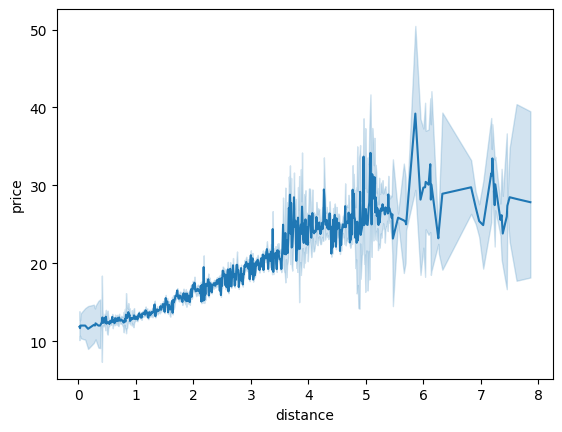

In [45]:
sns.lineplot( x=df2['distance'] , y=df2['price'])
plt.show()

Finally, we will examine the correlation between features. This is to identify pairs of features that are highly correlated, which leads to multicollinearity in linear models and redundant information for any model. So, we will construct a correlation matrix.

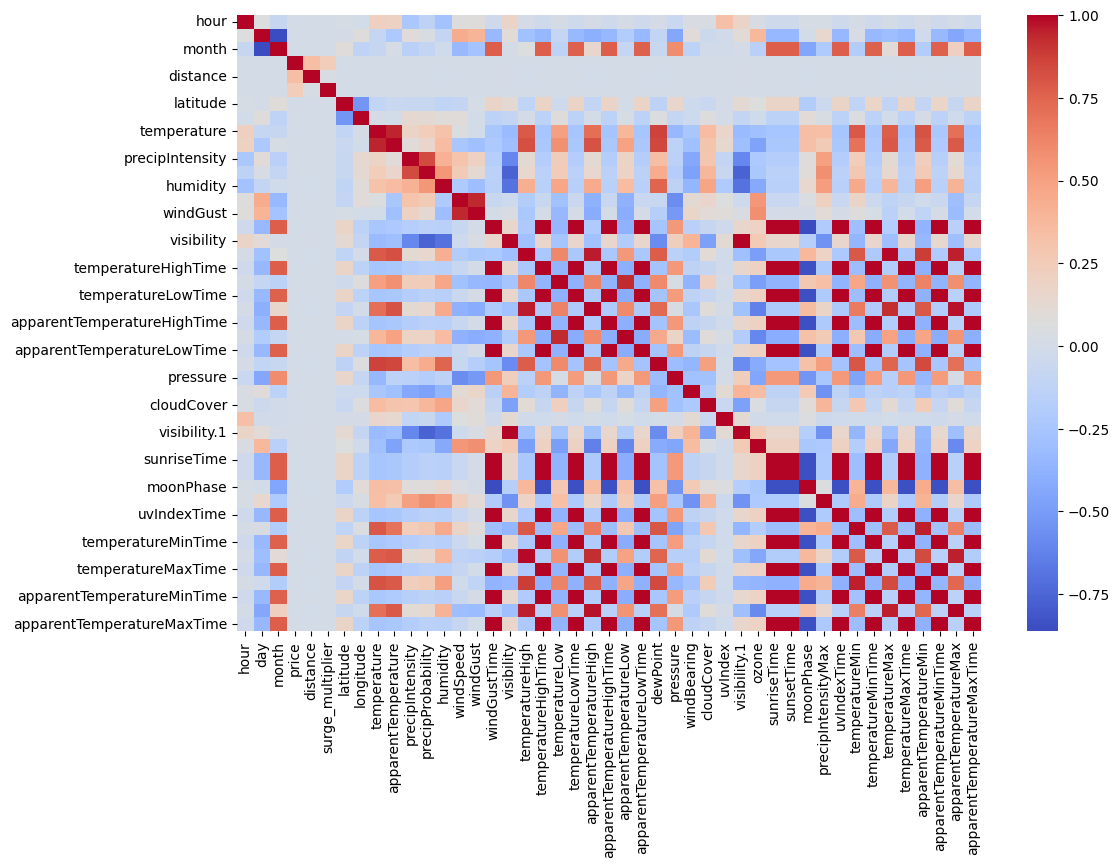

In [46]:
numeric_df = df2.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, fmt=".2f", cmap='coolwarm')
plt.show()

We can also use this correlation matrix to determine which features have correlation to the price.

In [47]:
price_correlations = corr_matrix['price'].drop('price').abs().sort_values()
print(price_correlations)

temperature                    0.000084
precipIntensity                0.000166
temperatureLow                 0.000182
apparentTemperature            0.000193
precipProbability              0.000243
apparentTemperatureHigh        0.000261
apparentTemperatureMax         0.000290
uvIndex                        0.000424
temperatureMin                 0.000428
ozone                          0.000460
temperatureHigh                0.000516
temperatureMax                 0.000550
hour                           0.000561
apparentTemperatureMin         0.000580
dewPoint                       0.000615
day                            0.000722
apparentTemperatureHighTime    0.000741
apparentTemperatureMaxTime     0.000746
temperatureLowTime             0.000754
temperatureHighTime            0.000759
sunriseTime                    0.000760
sunsetTime                     0.000760
apparentTemperatureLowTime     0.000761
uvIndexTime                    0.000763
temperatureMaxTime             0.000766


The surge multiplier and the distance seem to have significantly higher correlation with price, so we will examine these 2 features more deeper with another correlation matrix.

                     price  distance  surge_multiplier
price             1.000000  0.345061          0.240458
distance          0.345061  1.000000          0.024769
surge_multiplier  0.240458  0.024769          1.000000


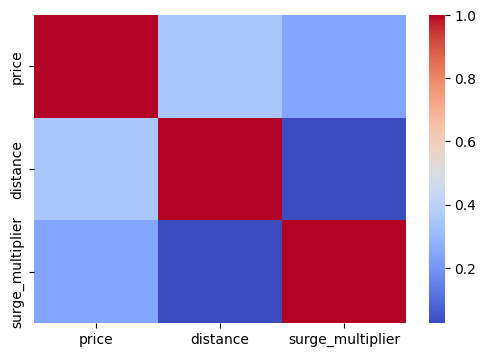

In [48]:
priority_columns = df[['price', 'distance', 'surge_multiplier']]
corr_matrix2 = priority_columns.corr()
print(corr_matrix2)
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix2, fmt=".2f", cmap='coolwarm')
plt.show()

It is important to note that Correlation coefficients measure only linear relationships. Non-linear effects, if present, won't be adequately captured by these values. Furthermore, the presence of outliers, the influence of additional variables not included in this analysis, and the inherent variability of ride-sharing pricing models can also affect these relationships.

Distance and surge multiplier have a moderate, positive association with price. But, it is important to note that correlation coefficients measure only linear relationships. So, non-linear effects won't be captures. Also, outliers and the influence of additional variables can effect these relationships.

We can also examine the categorical columns.

In [49]:
cat_col = df2.select_dtypes(include=['object','category']).columns.tolist()
df2_cat = df2[cat_col]
df2_cat.head()

,id,datetime,timezone,source,destination,cab_type,product_id,name,short_summary,long_summary,icon
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,Mostly Cloudy,Rain throughout the day.,partly-cloudy-night
1,4bd23055-6827-41c6-b23b-3c491f24e74d,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,Rain,"Rain until morning, starting again in the eve...",rain
2,981a3613-77af-4620-a42a-0c0866077d1e,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,Clear,Light rain in the morning.,clear-night
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,Clear,Partly cloudy throughout the day.,clear-night
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,Partly Cloudy,Mostly cloudy throughout the day.,partly-cloudy-night


What are the unique values in each categorical column?

In [50]:
for col in df2_cat:
    print(f'{col} : {df2_cat[col].unique()}')
    print()

id : ['424553bb-7174-41ea-aeb4-fe06d4f4b9d7'
 '4bd23055-6827-41c6-b23b-3c491f24e74d'
 '981a3613-77af-4620-a42a-0c0866077d1e' ...
 '633a3fc3-1f86-4b9e-9d48-2b7132112341'
 '727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e'
 'e7fdc087-fe86-40a5-a3c3-3b2a8badcbda']

datetime : ['2018-12-16 09:30:07' '2018-11-27 02:00:23' '2018-11-28 01:00:22' ...
 '2018-12-17 05:00:04' '2018-12-03 16:48:07' '2018-12-02 05:07:57']

timezone : ['America/New_York']

source : ['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']

destination : ['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']

cab_type : ['Lyft' 'Uber']

product_id : ['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux'
 '6f72dfc5-27f1-42e8-84db-ccc7a

In [51]:
# dropping timezone as there is only one timezone, and id and datetime as they are not categorical features
df2_cat = df2_cat.drop(['timezone', 'id', 'datetime'],axis=1)

We can now encode the categorical columns and measure their correlation with price.

In [1]:
df3 = df2.reset_index(drop=True).copy()

NameError: name 'df2' is not defined

In [2]:
cat_col = df2.select_dtypes(include=['object','category']).columns.tolist()

for col in cat_col:
    encoder = OneHotEncoder(handle_unknown='ignore')
    df_enc = pd.DataFrame(encoder.fit_transform(df2[[col]]).toarray())
    df_enc.columns = encoder.get_feature_names_out([col])
    df3 = df3.drop(col, axis=1)
    df3 = pd.concat([df3, df_enc], axis=1)

NameError: name 'cat_col' is not defined

Now, upon completing our exploratory data analysis, we can make informed decisions when cleaning our data and building models.